## Connect sheet and load data - nested

- sheet data - TODO
- [python sheets api docs](https://github.com/burnash/gspread#more-examples)
- [pandas dataframe docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
bunky_sheet_url = '' # TODO
sheet = gc.open_by_url(bunky_sheet_url)
worksheet = sheet.get_worksheet(0)
worksheet_hypo = sheet.get_worksheet(0)
worksheet_draslik = sheet.get_worksheet(1)

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

In [0]:
# raw data

data_hypo = worksheet_hypo.get_all_values()
features_hypo = data_hypo[0]
clean_data_hypo = data_hypo[1:]

data_draslik = worksheet_draslik.get_all_values()
features_draslik = data_draslik[0]
clean_data_draslik = data_draslik[1:]

In [0]:
# pandas dataframe and clean

def fixCell(cell):
  try:
    return float(cell.replace(',','.'))
  except ValueError:
    return 0 if cell == '' else cell


# pandata_full = pd.DataFrame.from_records(clean_data)# , columns=features)

pandata_hypo = pd.DataFrame.from_records(clean_data_hypo)
pandata_hypo = pandata_hypo.drop(0, axis=1)

pandata_draslik = pd.DataFrame.from_records(clean_data_draslik)
pandata_draslik = pandata_draslik.drop(0, axis=1)


In [0]:
pandata_hypo = pandata_hypo.applymap(fixCell)
pandata_draslik = pandata_draslik.applymap(fixCell)

In [0]:
pandata_draslik

In [0]:
# normalize

pandata_hypo_norm = pandata_hypo.loc[:, [1, 2, 3, 4]].values
pandata_hypo_norm = StandardScaler().fit_transform(pandata_hypo_norm)

pandata_draslik_norm = pandata_draslik.loc[:, [1, 2, 3, 4]].values
pandata_draslik_norm = StandardScaler().fit_transform(pandata_draslik_norm)

## Try PCA
[inspiration](http://bit.ly/2HkM0xP)

In [0]:
pca = PCA(n_components=2)
pc_hypo_raw = pca.fit_transform(pandata_hypo_norm)
pc_hypo = pd.DataFrame(data = pc_hypo_raw, columns = ['pc1', 'pc2'])

pc_draslik_raw = pca.fit_transform(pandata_draslik_norm)
pc_draslik = pd.DataFrame(data = pc_draslik_raw, columns = ['pc1', 'pc2'])


#finalDf = pd.concat([principalDf, pandata_full[[0]]], axis = 1)

## Plot

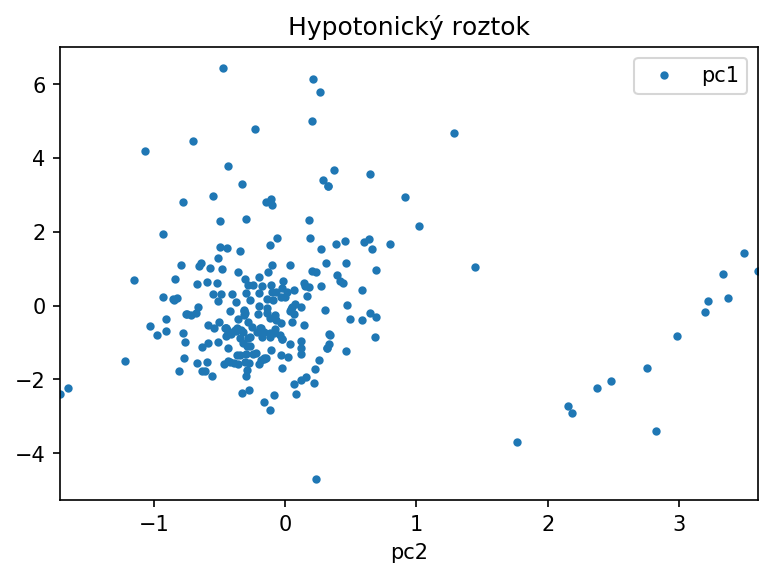

In [0]:
pc_hypo.plot(y='pc1', x='pc2', style='.', title=worksheet_hypo.title)
plt.show()

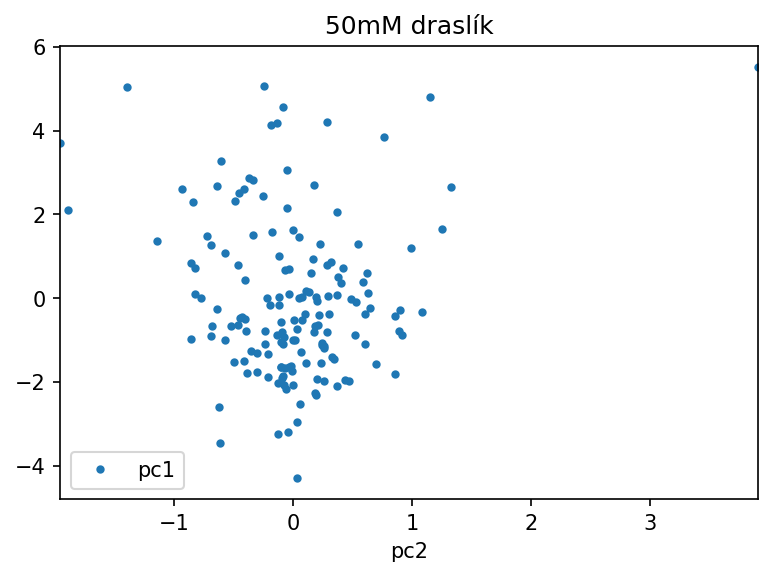

In [0]:
pc_draslik.plot(y='pc1', x='pc2', style='.', title=worksheet_draslik.title)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f0bb626-c33d-461e-9b29-d2fc16885d14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>